# Report

In [1]:
%cd ..
%pwd

/Users/andersvandvik/Repositories/project-thesis


'/Users/andersvandvik/Repositories/project-thesis'

In [2]:
import constants as cs
import data
import folium
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [3]:
# TODO: This must be changed
inst_to_coord = {
    0: [60.8024, 5.0107],
    1: [60.64, 3.72],
    2: [60.77, 3.50],
    3: [60.88, 3.60],
    4: [60.74, 3.61],
    5: [60.51, 3.26],
    6: [60.95, 3.58],
    7: [60.89, 3.67],
    8: [60.90, 3.81],
    9: [60.08, 2.63],
    10: [60.48, 2.82],
    11: [60.48, 2.82],
    12: [60.60, 2.77],
    13: [60.70, 2.93],
    14: [60.70, 2.93],
    15: [60.38, 2.79],
    16: [61.07, 2.50],
    17: [61.04, 2.34],
    18: [61.04, 2.34],
    19: [60.78, 2.89],
    20: [60.85, 2.65],
    21: [60.85, 2.65],
    22: [61.25, 1.85],
    23: [61.20, 1.82],
    24: [61.29, 1.90],
    25: [61.17, 2.18],
    26: [61.20, 2.20],
    27: [61.20, 2.27]
}

vessel_to_color = {
    0: 'blue',
    1: 'green',
    5: 'red'
}

In [4]:
file_path = '/Users/andersvandvik/Repositories/project-thesis/output/results/CS-I3-V1-WS0.json'

with open(file_path) as results:
    json_file = json.load(results)

In [5]:
def define_map():

    middle = [60.793142, 3.601824]

    m = folium.Map(location=middle,
                   zoom_start=8,
                   zoom_control=False)

    folium.TileLayer('cartodbpositron').add_to(m)
    
    return m

def add_markers_and_legs(sequence, m, vessel_to_color, inst_to_coord, vessel):
    for leg in sequence:
        inst = data.ALL_NODES[leg[0]].get_installation()
        color = vessel_to_color[vessel]
        folium.Marker(location=inst_to_coord[inst.get_index()], fill_color=color, radius=3).add_to(m)        

    for leg in sequence:
        start_inst, end_inst = data.ALL_NODES[leg[0]].get_installation(), data.ALL_NODES[leg[2]].get_installation()
        color = vessel_to_color[vessel]
        folium.PolyLine(locations=[inst_to_coord[start_inst.get_index()], 
                                   inst_to_coord[end_inst.get_index()]], 
                                   color=color, weight=2).add_to(m)

## Route

In [6]:
m = define_map()

for vessel in range(len(data.VESSELS)):
    add_markers_and_legs(json_file[str(vessel)], m, vessel_to_color, inst_to_coord, vessel)
m

## Speed profile

DEP -> SOD: 8.863529411764706
SOD -> SEQ: 8.28
SEQ -> TRO: 8.622857142857143
TRO -> DEP: 9.15157894736842


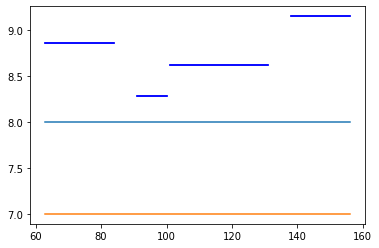

In [34]:
fig = go.Figure()

X, Y = [], []
for vessel in range(len(data.VESSELS)):
    speeds = []
    time_points = []
    for sequence in json_file[str(vessel)]:
        start_node, start_time, end_node, end_time, d_load, p_load, speed = sequence
        if speed == 0:
            continue
        start_inst, end_inst = data.ALL_NODES[start_node].get_installation(), data.ALL_NODES[end_node].get_installation()
        print(f'{start_inst.get_name()} -> {end_inst.get_name()}: {speed}')
        X.append([tp for tp in range(start_time, end_time)])
        Y.append([speed] * (end_time - start_time))
    
    for x, y in zip(X, Y):
        plt.plot(x, y, color='b')
        
    for x, y in zip(X, Y):
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines', line=dict(color='royalblue', width=2)))

flat_X = [x_coord for sub_x in X for x_coord in sub_x]
lowest_speed = [7 for _ in range(len(flat_X))]
eight_speed = [8 for _ in range(len(flat_X))]
nine_speed = [9 for _ in range(len(flat_X))]
ten_speed = [10 for _ in range(len(flat_X))]
eleven_speed = [11 for _ in range(len(flat_X))]
twelve_speed = [12 for _ in range(len(flat_X))]
thirteen_speed = [13 for _ in range(len(flat_X))]
highest_speed = [14 for _ in range(len(flat_X))]
plt.plot(flat_X, efficient_speed)
plt.plot(flat_X, lowest_speed)

fig.add_trace(go.Scatter(x=flat_X, y=lowest_speed, mode='lines', line=dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x=flat_X, y=eight_speed, mode='lines', line=dict(color='tan', width=1, dash='dot')))
fig.add_trace(go.Scatter(x=flat_X, y=nine_speed, mode='lines', line=dict(color='tan', width=1, dash='dot')))
fig.add_trace(go.Scatter(x=flat_X, y=ten_speed, mode='lines', line=dict(color='tan', width=1, dash='dot')))
fig.add_trace(go.Scatter(x=flat_X, y=eleven_speed, mode='lines', line=dict(color='tan', width=1, dash='dot')))
fig.add_trace(go.Scatter(x=flat_X, y=twelve_speed, mode='lines', line=dict(color='tan', width=1, dash='dot')))
fig.add_trace(go.Scatter(x=flat_X, y=thirteen_speed, mode='lines', line=dict(color='tan', width=1, dash='dot')))
fig.add_trace(go.Scatter(x=flat_X, y=highest_speed, mode='lines', line=dict(color='firebrick', width=1)))


fig.update_layout(yaxis=dict(
    showgrid=True, 
    zeroline=True, 
    showline=True, 
    showticklabels=True), 
                  plot_bgcolor='white')

plt.show()
fig.show()